In [1]:
library(readxl)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read_excel("train.xlsx")

In [3]:
head(df)

Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PID0x6418,2,Yes,No,Yes,No,4.760603,Richard,NA,Larre,⋯,NA,9.857562,NA,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
PID0x25d5,4,Yes,Yes,No,No,4.910669,Mike,NA,Brycen,⋯,Multiple,5.522560,normal,1,NA,1,1,0,NA,Cystic fibrosis
PID0x4a82,6,Yes,No,No,No,4.893297,Kimberly,NA,Nashon,⋯,Singular,NA,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
PID0x4ac8,12,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,⋯,Singular,7.919321,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x1bf7,11,Yes,No,NA,Yes,4.720703,Johanna,Stutzman,Suave,⋯,Multiple,4.098210,NA,0,0,0,0,NA,Multifactorial genetic inheritance disorders,Cancer
PID0x44fe,14,Yes,No,Yes,No,5.103188,Richard,NA,Coleston,⋯,Multiple,10.272230,normal,1,0,0,1,0,Single-gene inheritance diseases,Cystic fibrosis


In [4]:
df$"Genes in mother's side"<-ifelse(df$"Genes in mother's side"=="Yes",1,0)
df$"Inherited from father"<-ifelse(df$"Inherited from father"=="Yes",1,0)
df$"Maternal gene"<-ifelse(df$"Maternal gene"=="Yes",1,0)
df$"Paternal gene"<-ifelse(df$"Paternal gene"=="Yes",1,0)
head(df)

Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PID0x6418,2,1,0,1,0,4.760603,Richard,NA,Larre,⋯,NA,9.857562,NA,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
PID0x25d5,4,1,1,0,0,4.910669,Mike,NA,Brycen,⋯,Multiple,5.522560,normal,1,NA,1,1,0,NA,Cystic fibrosis
PID0x4a82,6,1,0,0,0,4.893297,Kimberly,NA,Nashon,⋯,Singular,NA,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
PID0x4ac8,12,1,0,1,0,4.705280,Jeffery,Hoelscher,Aayaan,⋯,Singular,7.919321,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x1bf7,11,1,0,NA,1,4.720703,Johanna,Stutzman,Suave,⋯,Multiple,4.098210,NA,0,0,0,0,NA,Multifactorial genetic inheritance disorders,Cancer
PID0x44fe,14,1,0,1,0,5.103188,Richard,NA,Coleston,⋯,Multiple,10.272230,normal,1,0,0,1,0,Single-gene inheritance diseases,Cystic fibrosis


In [5]:
summary(df)

  Patient Id         Patient Age     Genes in mother's side
 Length:22083       Min.   : 0.000   Min.   :0.0000        
 Class :character   1st Qu.: 3.000   1st Qu.:0.0000        
 Mode  :character   Median : 7.000   Median :1.0000        
                    Mean   : 6.974   Mean   :0.5952        
                    3rd Qu.:11.000   3rd Qu.:1.0000        
                    Max.   :14.000   Max.   :1.0000        
                    NA's   :1427                           
 Inherited from father Maternal gene    Paternal gene    Blood cell count (mcL)
 Min.   :0.0000        Min.   :0.0000   Min.   :0.0000   Min.   :4.093         
 1st Qu.:0.0000        1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:4.763         
 Median :0.0000        Median :1.0000   Median :0.0000   Median :4.899         
 Mean   :0.3969        Mean   :0.5524   Mean   :0.4336   Mean   :4.899         
 3rd Qu.:1.0000        3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:5.034         
 Max.   :1.0000        Max.   :1.0000   

In [6]:
drop <- c("Patient Id","Genes in mother's side","Patient First Name","Family Name","Father's name","Institute Name","Location of Institute")
df = df[,!(names(df) %in% drop)]

In [7]:
head(df)

Patient Age,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2,0,1,0,4.760603,NA,NA,Alive,Normal (30-60),Normal,⋯,NA,9.857562,NA,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
4,1,0,0,4.910669,NA,23,Deceased,Tachypnea,Normal,⋯,Multiple,5.522560,normal,1,NA,1,1,0,NA,Cystic fibrosis
6,0,0,0,4.893297,41,22,Alive,Normal (30-60),Tachycardia,⋯,Singular,NA,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
12,0,1,0,4.705280,21,NA,Deceased,Tachypnea,Normal,⋯,Singular,7.919321,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
11,0,NA,1,4.720703,32,NA,Alive,Tachypnea,Tachycardia,⋯,Multiple,4.098210,NA,0,0,0,0,NA,Multifactorial genetic inheritance disorders,Cancer
14,0,1,0,5.103188,NA,NA,Deceased,NA,Normal,⋯,Multiple,10.272230,normal,1,0,0,1,0,Single-gene inheritance diseases,Cystic fibrosis


In [8]:
drop <- c("Test 1","Test 2","Test 3","Test 4","Test 5","Parental consent","Place of birth")
df = df[,!(names(df) %in% drop)]

In [9]:
head(df)
tail(df)

Patient Age,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2,0,1,0,4.760603,NA,NA,Alive,Normal (30-60),Normal,⋯,NA,9.857562,NA,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
4,1,0,0,4.910669,NA,23,Deceased,Tachypnea,Normal,⋯,Multiple,5.522560,normal,1,NA,1,1,0,NA,Cystic fibrosis
6,0,0,0,4.893297,41,22,Alive,Normal (30-60),Tachycardia,⋯,Singular,NA,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
12,0,1,0,4.705280,21,NA,Deceased,Tachypnea,Normal,⋯,Singular,7.919321,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
11,0,NA,1,4.720703,32,NA,Alive,Tachypnea,Tachycardia,⋯,Multiple,4.098210,NA,0,0,0,0,NA,Multifactorial genetic inheritance disorders,Cancer
14,0,1,0,5.103188,NA,NA,Deceased,NA,Normal,⋯,Multiple,10.272230,normal,1,0,0,1,0,Single-gene inheritance diseases,Cystic fibrosis


Patient Age,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
9,1,1,1,5.012599,47,NA,Deceased,NA,Normal,⋯,NA,12.000000,slightly abnormal,NA,1,0,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,1,1,0,5.258298,35,64,Deceased,Normal (30-60),Tachycardia,⋯,Multiple,6.584811,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
8,1,0,1,4.974220,NA,56,Alive,Normal (30-60),Normal,⋯,Multiple,7.041556,inconclusive,1,1,1,1,0,Multifactorial genetic inheritance disorders,Diabetes
8,0,1,0,5.186470,35,51,Deceased,Tachypnea,Normal,⋯,Singular,7.715464,normal,0,0,0,1,NA,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
7,0,1,1,4.858543,19,NA,Alive,Tachypnea,Tachycardia,⋯,Multiple,8.437670,abnormal,1,1,1,0,0,NA,Leigh syndrome
11,0,0,0,4.738067,32,62,Deceased,Normal (30-60),Normal,⋯,Singular,11.188371,normal,1,0,1,1,1,Multifactorial genetic inheritance disorders,Diabetes


In [10]:
dim(df)

[1] 22083    31

In [11]:
summary(df)

  Patient Age     Inherited from father Maternal gene    Paternal gene   
 Min.   : 0.000   Min.   :0.0000        Min.   :0.0000   Min.   :0.0000  
 1st Qu.: 3.000   1st Qu.:0.0000        1st Qu.:0.0000   1st Qu.:0.0000  
 Median : 7.000   Median :0.0000        Median :1.0000   Median :0.0000  
 Mean   : 6.974   Mean   :0.3969        Mean   :0.5524   Mean   :0.4336  
 3rd Qu.:11.000   3rd Qu.:1.0000        3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :14.000   Max.   :1.0000        Max.   :1.0000   Max.   :1.0000  
 NA's   :1427     NA's   :306           NA's   :2810                     
 Blood cell count (mcL)  Mother's age    Father's age      Status         
 Min.   :4.093          Min.   :18.00   Min.   :20.00   Length:22083      
 1st Qu.:4.763          1st Qu.:26.00   1st Qu.:31.00   Class :character  
 Median :4.899          Median :35.00   Median :42.00   Mode  :character  
 Mean   :4.899          Mean   :34.53   Mean   :41.97                     
 3rd Qu.:5.034          3rd Qu.:4

In [12]:
df <- subset(df, !is.na("Genetic Disorder") & !is.na("Disorder Subclass"))
dim(df)

[1] 22083    31

In [13]:
n_distinct(df$'Genetic Disorder')
df %>% drop_na('Genetic Disorder')

[1] 4

Patient Age,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,⋯,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2,0,1,0,4.760603,NA,NA,Alive,Normal (30-60),Normal,⋯,NA,9.857562,NA,1,1,1,1,1,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
6,0,0,0,4.893297,41,22,Alive,Normal (30-60),Tachycardia,⋯,Singular,NA,normal,0,1,1,1,1,Multifactorial genetic inheritance disorders,Diabetes
12,0,1,0,4.705280,21,NA,Deceased,Tachypnea,Normal,⋯,Singular,7.919321,inconclusive,0,0,1,0,0,Mitochondrial genetic inheritance disorders,Leigh syndrome
11,0,NA,1,4.720703,32,NA,Alive,Tachypnea,Tachycardia,⋯,Multiple,4.098210,NA,0,0,0,0,NA,Multifactorial genetic inheritance disorders,Cancer
14,0,1,0,5.103188,NA,NA,Deceased,NA,Normal,⋯,Multiple,10.272230,normal,1,0,0,1,0,Single-gene inheritance diseases,Cystic fibrosis
3,0,1,1,4.901080,NA,63,Alive,Normal (30-60),NA,⋯,Multiple,6.825974,normal,0,0,0,0,0,Single-gene inheritance diseases,Tay-Sachs
3,0,1,1,4.964816,40,NA,Alive,Tachypnea,Normal,⋯,Singular,9.836352,inconclusive,0,0,1,NA,0,Single-gene inheritance diseases,Tay-Sachs
11,0,1,0,5.209058,45,44,Alive,Tachypnea,Tachycardia,⋯,Multiple,6.669552,slightly abnormal,1,1,1,0,1,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,1,1,1,4.752272,44,42,Alive,Tachypnea,Tachycardia,⋯,Multiple,6.397702,abnormal,0,0,1,1,1,Multifactorial genetic inheritance disorders,Diabetes


In [14]:
n_distinct(df$'Genetic Disorder')

[1] 4

In [15]:
class(df$'Genetic Disorder')

[1] "character"

In [16]:
names(df) <- gsub(" ", "_", names(df))

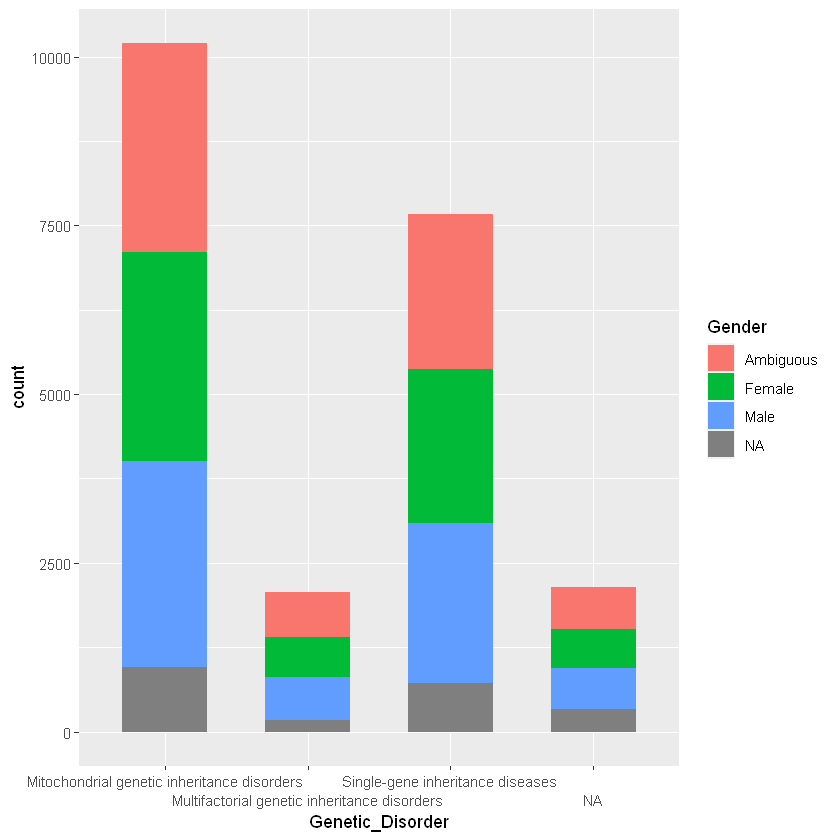

In [17]:
library(ggplot2)
library(grid)
ggplot(data = df, aes(Genetic_Disorder,fill = Gender)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 2))

In [18]:
df %>% summarise(across(everything(), ~ sum(is.na(.))))

Patient_Age,Inherited_from_father,Maternal_gene,Paternal_gene,Blood_cell_count_(mcL),Mother's_age,Father's_age,Status,Respiratory_Rate_(breaths/min),Heart_Rate_(rates/min,⋯,Birth_defects,White_Blood_cell_count_(thousand_per_microliter),Blood_test_result,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Genetic_Disorder,Disorder_Subclass
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1427,306,2810,0,0,6036,5986,0,2149,2113,⋯,2154,2148,2145,2155,2222,2101,2113,2153,2146,2168


In [19]:
sapply(df, function(x) sum(is.na(x)))

Patient_Age 
                                            1427 
                           Inherited_from_father 
                                             306 
                                   Maternal_gene 
                                            2810 
                                   Paternal_gene 
                                               0 
                          Blood_cell_count_(mcL) 
                                               0 
                                    Mother's_age 
                                            6036 
                                    Father's_age 
                                            5986 
                                          Status 
                                               0 
                  Respiratory_Rate_(breaths/min) 
                                            2149 
                           Heart_Rate_(rates/min 
                                            2113 
                                       Follow-up 
                                            2166 
                                          Gender 
                                            2173 
                                  Birth_asphyxia 
                                            2139 
      Autopsy_shows_birth_defect_(if_applicable) 
                                            1026 
          Folic_acid_details_(peri-conceptional) 
                                            2117 
                    H/O_serious_maternal_illness 
                                            2152 
                  H/O_radiation_exposure_(x-ray) 
                                            2153 
                             H/O_substance_abuse 
                                            2195 
                     Assisted_conception_IVF/ART 
                                            2122 
    History_of_anomalies_in_previous_pregnancies 
                                            2172 
                        No._of_previous_abortion 
                                            2162 
                                   Birth_defects 
                                            2154 
White_Blood_cell_count_(thousand_per_microliter) 
                                            2148 
                               Blood_test_result 
                                            2145 
                                       Symptom_1 
                                            2155 
                                       Symptom_2 
                                            2222 
                                       Symptom_3 
                                            2101 
                                       Symptom_4 
                                            2113 
                                       Symptom_5 
                                            2153 
                                Genetic_Disorder 
                                            2146 
                               Disorder_Subclass 
                                            2168

In [20]:
head(df[, c(11:23), drop=FALSE])

Follow-up,Gender,Birth_asphyxia,Autopsy_shows_birth_defect_(if_applicable),Folic_acid_details_(peri-conceptional),H/O_serious_maternal_illness,H/O_radiation_exposure_(x-ray),H/O_substance_abuse,Assisted_conception_IVF/ART,History_of_anomalies_in_previous_pregnancies,No._of_previous_abortion,Birth_defects,White_Blood_cell_count_(thousand_per_microliter)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
High,NA,NA,Not applicable,No,NA,No,No,No,Yes,NA,NA,9.857562
High,NA,No,None,Yes,Yes,Not applicable,Not applicable,No,Yes,NA,Multiple,5.522560
Low,NA,No record,Not applicable,Yes,No,Yes,NA,Yes,Yes,4,Singular,NA
High,Male,Not available,No,No,Yes,-,Not applicable,NA,Yes,1,Singular,7.919321
Low,Male,Not available,Not applicable,No,Yes,-,Not applicable,Yes,No,4,Multiple,4.098210
Low,Female,Not available,None,No,No,No,No,NA,No,0,Multiple,10.272230


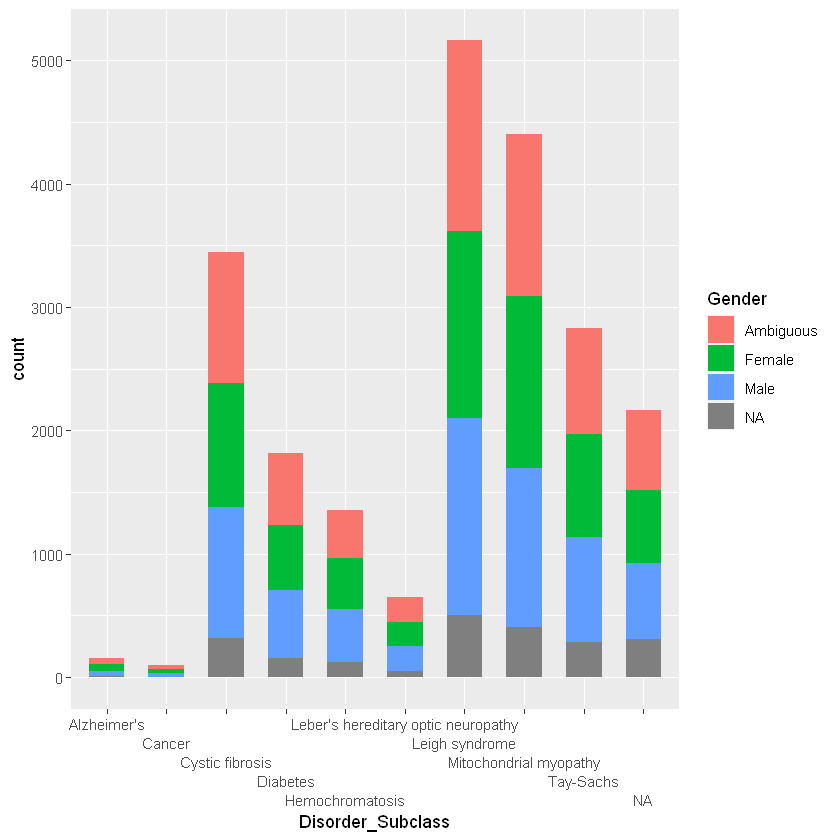

In [21]:
ggplot(data = df, aes(Disorder_Subclass,fill = Gender)) +
geom_bar(width = 0.6)+  scale_x_discrete(guide = guide_axis(n.dodge = 5))

In [22]:
#load libraries
library(GGally)

#create pairs plot
pairs(df)



Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



ERROR: Error in pairs.default(df): non-numeric argument to 'pairs'
